<p align="center">
  <img width="550" height="281" src="http://encuentratubeca.mx/wp-content/uploads/2019/04/logoudgvectores_1_origsdaasss.png">
</p>

# <center>Proyecto de análisis EDA</center>             
------
## Maestría en Ciencias de Datos
#### Mauricio A. Tenorio Vargas
#### Marzo  2023

### Dataset y contexto

In [2]:
# Importamos librerias necesarias para el analisis de los datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from numpy.random import seed
import seaborn as sns
import altair as alt

#### Informacion del Dataset
Dataset extraido de: https://www.kaggle.com/deepcontractor/top-video-games-19952021-metacritic

Video games metactrictc dataset, extraido de Kaggle  consisde en un archivo csv con 6 variables:
* name (Nombre del titulo)
* Platform (Plataforma) #Nota: Un mismo titulo puede tener multiples obesrvacciones ya que el review depende de la plataforma
* Metascore (Score ponderado en metacritic)
* Userscore (Score ponderado por los usuarios)
* Genre (Categoria asignada del titulo)
* release_date (Fecha de estreno del titulo en la plataforma indicada)
* summary (Resumen del titulo)

El dataset consiste en registros de todos los titulos de videojuegos publicados desde el año 1994 en la mayoria de plataformas con reviews mayores a 50. 

Metacritic es una pagina web que se encarga de seleccionar un gran grupo de los críticos más respetados del mundo, asignan puntuaciones a sus reseñas y apliquan un promedio ponderado para resumir la variedad de sus opiniones.

### Analisis descriptivo

In [3]:
#Descargamos dataset directamente desde el url
path = "C:\\Users\\mauri\\Downloads\\metacritic.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,titles,platforms,metascore,userscore,genre,date
0,Sniper Elite VR,PC,67,7.1,action,8-Jul-21
1,Boomerang X,PC,81,6.6,action,8-Jul-21
2,Boomerang X,Switch,78,6.3,action,8-Jul-21
3,Alex Kidd in Miracle World DX,PlayStation 4,62,6.4,action,22-Jun-21
4,Alex Kidd in Miracle World DX,Switch,64,7.0,action,22-Jun-21


In [5]:
df.shape

(18456, 6)

Cleaning

In [6]:
df.isnull().sum()

titles       0
platforms    0
metascore    0
userscore    0
genre        0
date         0
dtype: int64

Unicamente 114 observaciones tienen variables vacias y todas son de summary, reemplazaremos estos valores nulos

#### Juegos por platafroma

In [7]:
platforms = df['platforms'].value_counts().reset_index()
platforms.columns = ["Platform", "Count"]
platforms.head()

,Platform,Count
0,PC,5810
1,PlayStation 4,1851
2,Xbox 360,1462
3,PlayStation 3,1225
4,Xbox One,1144


<Axes: xlabel='Platform', ylabel='Count'>

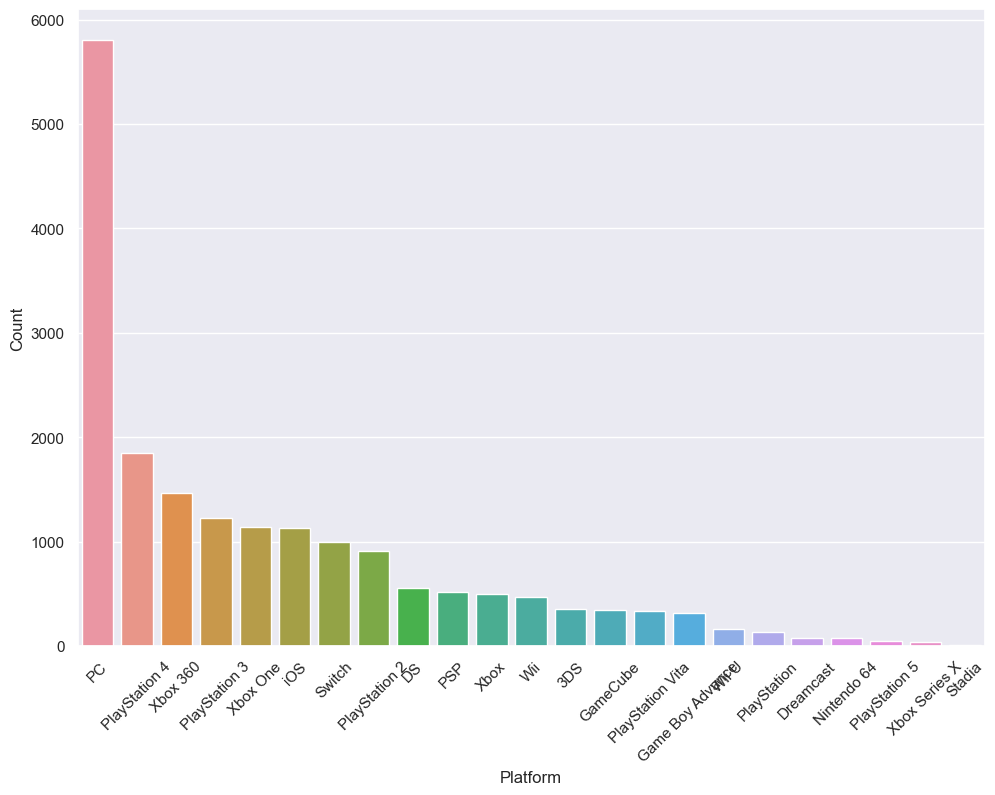

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=45)
sns.barplot(data=platforms, x="Platform", y="Count")

Podemos observar que la plataforma con mayor numero de juegos es PC, esto es normal ya que es mucho mas facil paara desarrolladores independientes crear y publicar juegos en PC que en otras plataformas

#### Juegos por Genero

In [14]:
genre = df['genre'].value_counts().reset_index()
genre.columns = ["genre", "Count"]
genre.head()

,genre,Count
0,action,3940
1,role-playing,2140
2,strategy,1813
3,adventure,1725
4,first-person,1590


<Axes: xlabel='genre', ylabel='Count'>

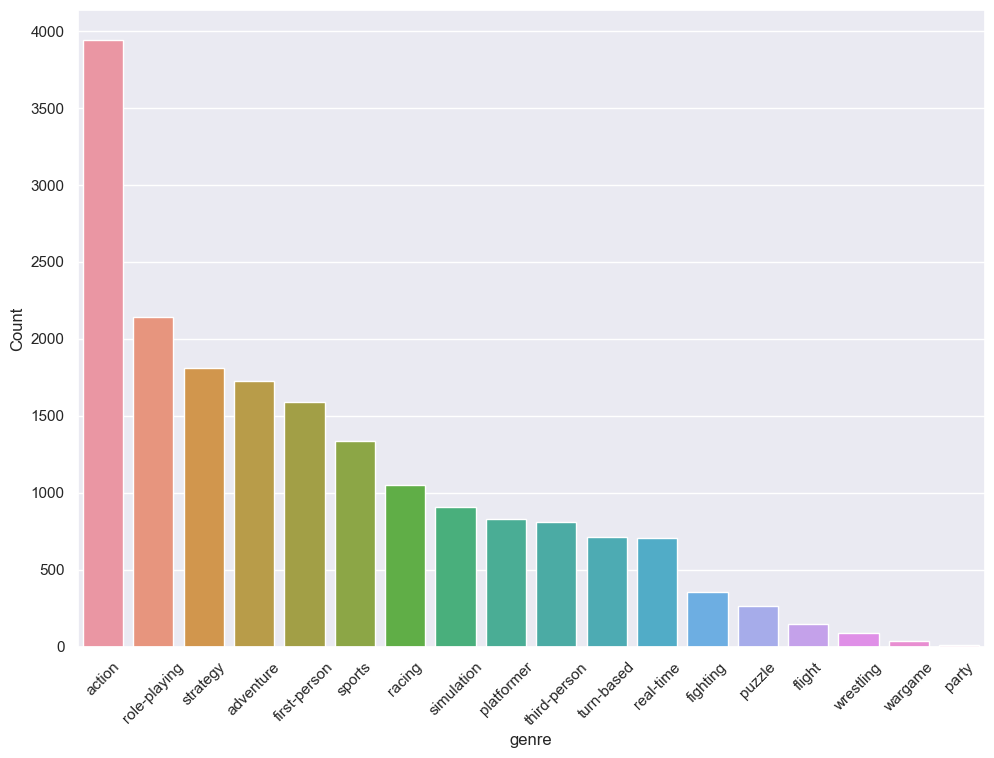

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=45)
sns.barplot(data=genre, x="genre", y="Count")

Podemos observar que el genero con mayor frecuencia es accion seguido de juegos de rol y estrategia. Los genermos menos recurentes son Party games y juegos de guerra.

### Tablas de contingencia

#### Tabla 1: Score
Crearemos categorias basadas el el puntaje de metacritic

In [ ]:
bins = [50, 60, 70, 80, 90, 100] 
names = ['Horrible', 'Bad', 'Good', 'Great', 'Excelent']

df['Score'] = pd.cut(df['metascore'], bins, labels=names)
df.head()

,titles,platforms,metascore,userscore,genre,date,Score
0,Sniper Elite VR,PC,67,7.1,action,8-Jul-21,Bad
1,Boomerang X,PC,81,6.6,action,8-Jul-21,Great
2,Boomerang X,Switch,78,6.3,action,8-Jul-21,Good
3,Alex Kidd in Miracle World DX,PlayStation 4,62,6.4,action,22-Jun-21,Bad
4,Alex Kidd in Miracle World DX,Switch,64,7.0,action,22-Jun-21,Bad


In [ ]:
cross_score = pd.crosstab(df['genre'], df['Score'], margins=True)
cross_score

Score,Horrible,Bad,Good,Great,Excelent,All
genre,,,,,,
action,669,1244,1390,532,57,3892
adventure,157,432,752,355,20,1716
fighting,49,80,131,73,16,349
first-person,168,366,580,407,59,1580
flight,15,48,53,29,2,147
party,4,4,2,2,0,12
platformer,113,219,268,188,33,821
puzzle,35,48,116,58,4,261
racing,130,301,328,267,19,1045


#### Tabla 2: Genre vs Platfrom

In [ ]:
cross = pd.crosstab(df['genre'], df['platforms'])
cross

platforms,3DS,DS,Dreamcast,Game Boy Advance,GameCube,Nintendo 64,PC,PSP,PlayStation,PlayStation 2,...,PlayStation Vita,Stadia,Switch,Wii,Wii U,Xbox,Xbox 360,Xbox One,Xbox Series X,iOS
genre,,,,,,,,,,,,,,,,,,,,,
action,93,89,12,53,50,12,806,72,22,101,...,97,1,264,96,60,84,369,328,8,397
adventure,19,17,3,4,4,2,743,12,3,10,...,39,2,169,28,9,8,54,144,4,144
fighting,6,11,12,19,25,3,5,31,15,72,...,1,0,0,20,0,25,55,0,0,7
first-person,7,20,3,7,22,9,638,15,5,52,...,10,0,53,26,4,69,170,130,5,38
flight,3,1,2,1,1,0,61,3,1,12,...,1,0,7,4,2,6,13,4,1,2
party,0,0,1,0,5,2,0,0,2,0,...,0,0,0,0,0,2,0,0,0,0
platformer,40,56,6,84,53,13,112,30,14,78,...,28,0,0,52,29,30,89,4,0,21
puzzle,3,54,2,14,8,2,45,24,1,5,...,0,0,0,34,0,1,42,0,0,6
racing,16,20,0,16,37,8,197,44,10,99,...,14,0,45,29,10,59,102,96,4,47


#### Tabla 3: Heatmap

Text(0.5, 1.0, 'Heatmap')

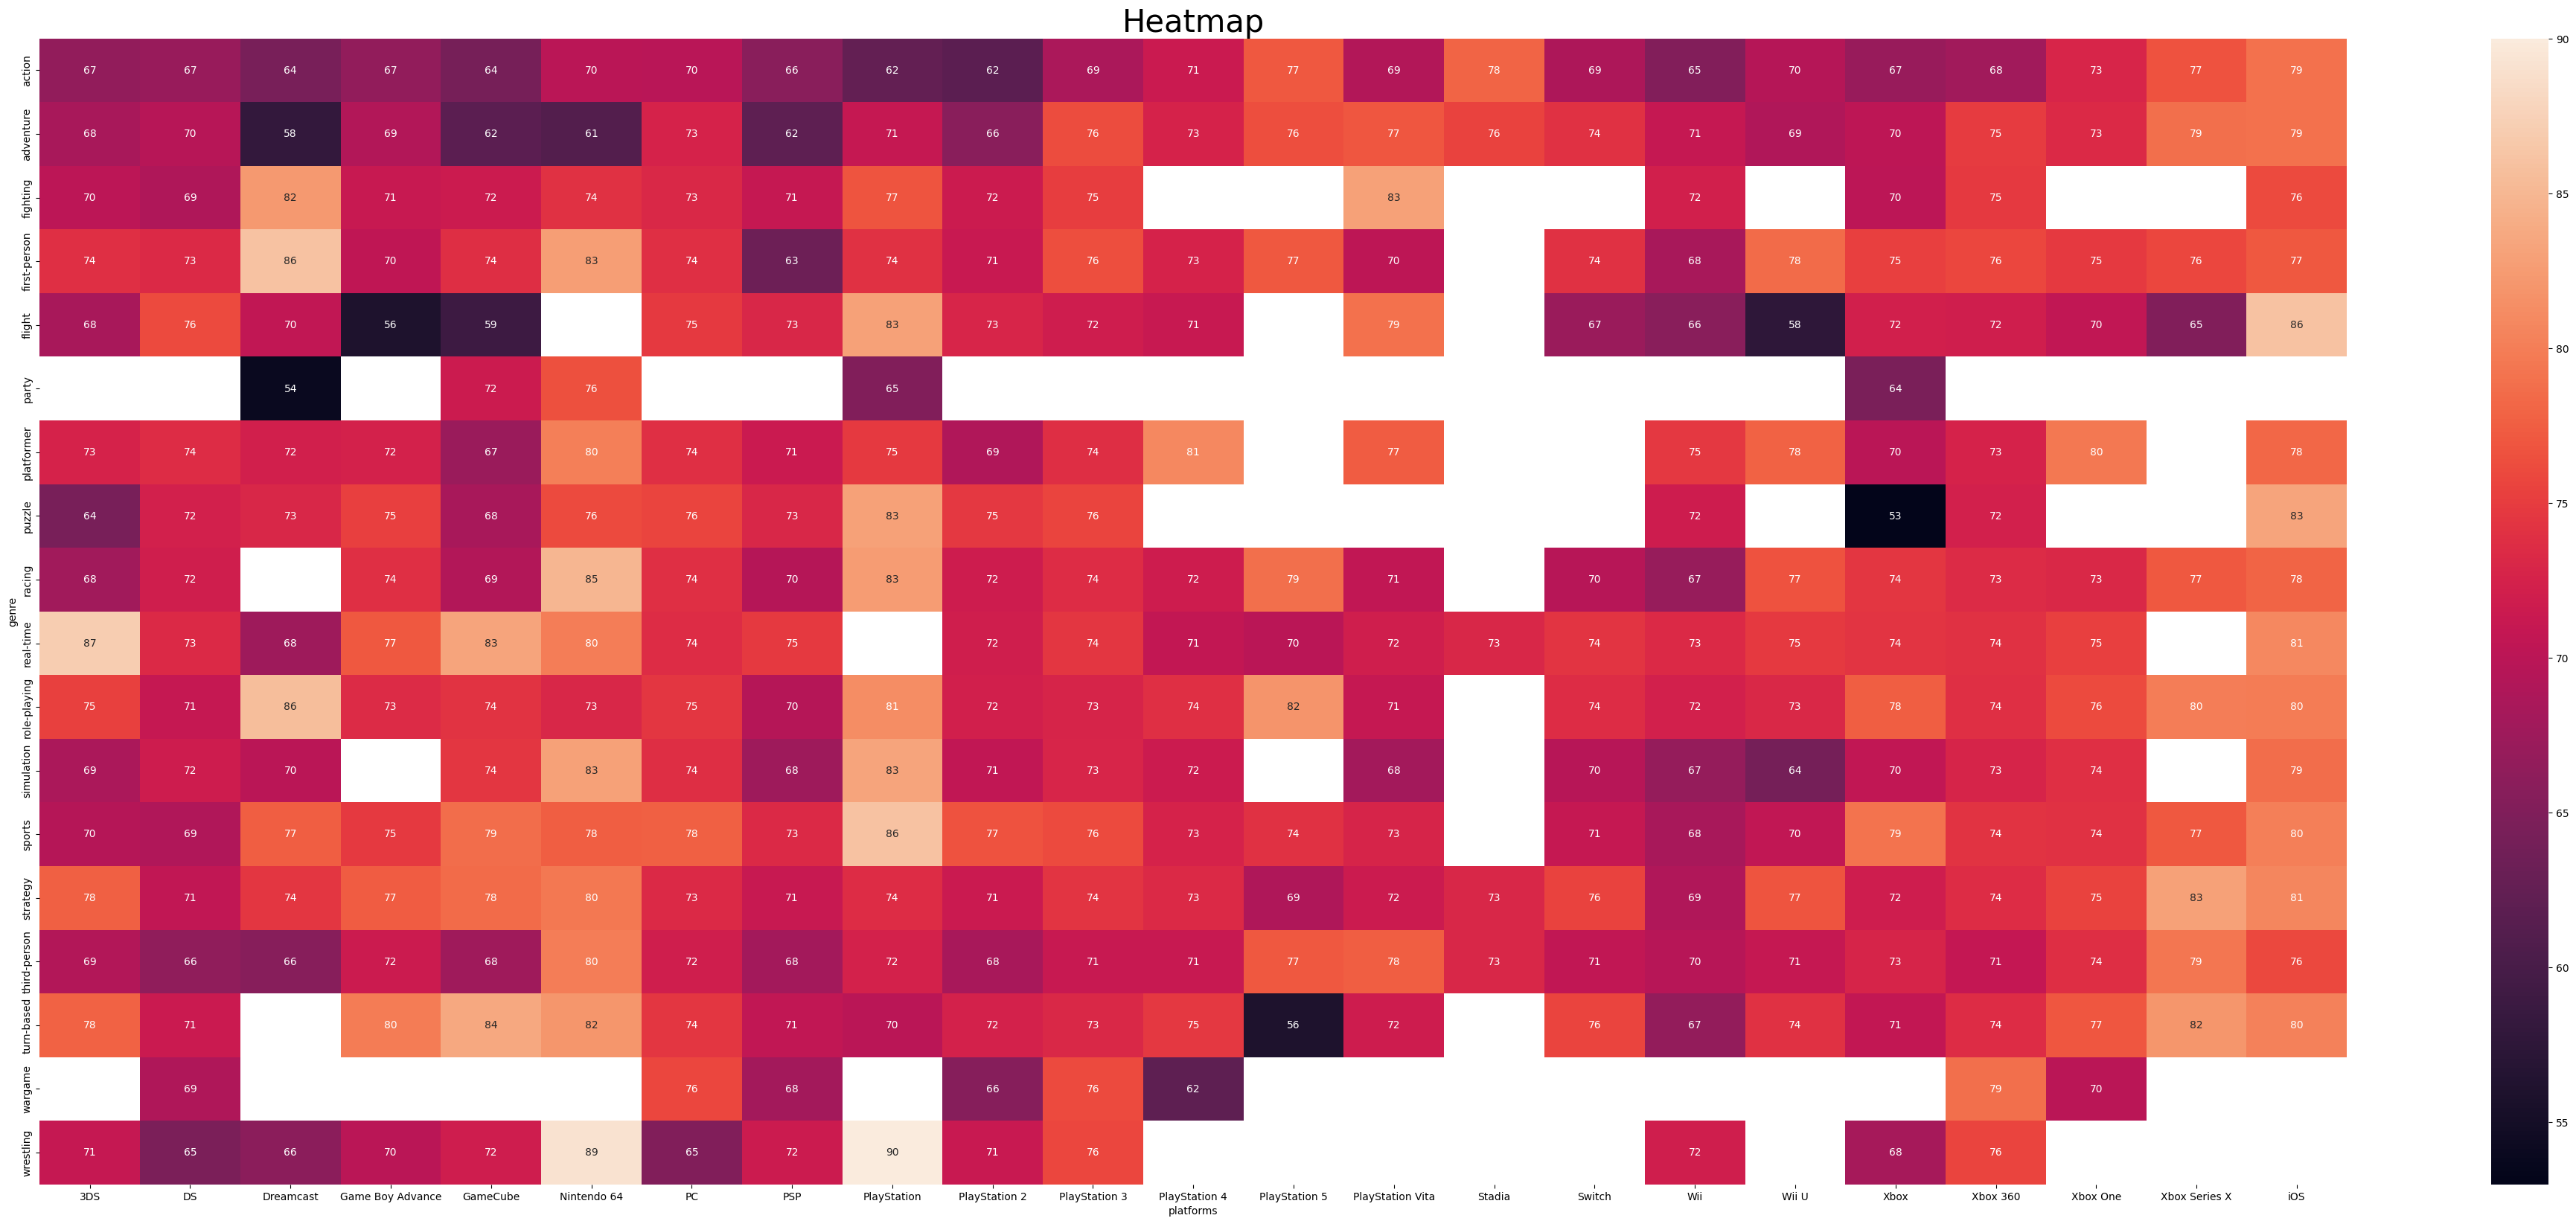

In [ ]:
df_heatmap = df.pivot_table(values='metascore', index='genre', columns='platforms')
plt.subplots(figsize=(50,20))
sns.heatmap(df_heatmap, annot=True)
plt.title('Heatmap', fontsize=30)

### Best games by Platform

In [ ]:
best_mean_by_genre = df.groupby(['genre'])['metascore'].mean()
best_mean_by_genre = best_mean_by_genre.to_frame()
best_mean_by_genre.sort_values(by=['metascore'], ascending = False)

,metascore
genre,
sports,75.367988
wargame,74.820513
turn-based,74.558042
role-playing,74.319626
first-person,74.123899
real-time,73.964689
strategy,73.865416
puzzle,73.371648
adventure,73.324638


Los generos con mejores reviews por media son deportes, juegos de guerra y RPGs, vamos a verifiar con una medida de tendencia central distinta, la mediana.

In [ ]:
best_median_by_genre = df.groupby(['genre'])['metascore'].median()
best_median_by_genre = best_median_by_genre.to_frame()
best_median_by_genre.sort_values(by=['metascore'], ascending = False)

,metascore
genre,
sports,77.0
wargame,76.0
real-time,75.0
puzzle,75.0
turn-based,75.0
strategy,75.0
role-playing,75.0
wrestling,75.0
first-person,75.0


El top 3 es igual, aunque algunos generos si cambiaron de posicion.

### Año con los mejores titulos

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year # creamos nueva coclumna solo ccon el año
df.head()

,titles,platforms,metascore,userscore,genre,date,Score,year
0,Sniper Elite VR,PC,67,7.1,action,8-Jul-21,Bad,2021
1,Boomerang X,PC,81,6.6,action,8-Jul-21,Great,2021
2,Boomerang X,Switch,78,6.3,action,8-Jul-21,Good,2021
3,Alex Kidd in Miracle World DX,PlayStation 4,62,6.4,action,22-Jun-21,Bad,2021
4,Alex Kidd in Miracle World DX,Switch,64,7.0,action,22-Jun-21,Bad,2021


In [ ]:
best_median_by_year = df.groupby(['year'])['metascore'].median()
best_median_by_year = best_median_by_year.to_frame().reset_index()
best_median_by_year.sort_values(by=['metascore'], ascending = False)

,year,metascore
1,1995,90.0
5,1999,88.5
2,1996,85.0
4,1998,85.0
3,1997,84.0
0,1994,83.0
6,2000,77.0
27,2021,76.0
18,2012,75.0
26,2020,75.0


El año con los mejores juegoss basados en la mediana de su calificaciones es 1990!, mientras que el peor es 2007. De hecho la era dorada de los videojuegos fueron los 90s, el top 6 esta entre 1990 y 1999.